In [1]:
# widen jupyter notebook window
from IPython.display import display, HTML
display(HTML("<style>.container {width:95% !important; }</style>"))

# check environment
import os
print(f'Conda Environment: ' + os.environ['CONDA_DEFAULT_ENV'])

from platform import python_version
print(f'python version: {python_version()}')

Conda Environment: ROICaT
python version: 3.9.13


In [2]:
import numpy as np
import scipy.sparse
import matplotlib.pyplot as plt

In [3]:
# %load_ext autoreload
# %autoreload 2
import roicat

In [4]:
use_classificationResults = False

results_tracking = roicat.helpers.pickle_load(r'/media/rich/bigSSD/analysis_data/ROICaT/ROI_tracking/Nghia/bigRun_20230507/plane_1/NN8/ROICaT.tracking.results.stringency_0.7.pkl')

if use_classificationResults:
    results_classification = roicat.helpers.pickle_load(r'/home/rich/Desktop/mouse_0322R.ROICaT.classification_drawn.results.DAY0.pkl')
else:
    results_classification = None

In [10]:
results_tracking['cluster_quality_metrics'].keys()

dict_keys(['cs_intra_means', 'cs_intra_mins', 'cs_intra_maxs', 'cs_sil'])

In [28]:
results_tracking

{'UCIDs': array([2942,   -1, 1035, ...,   -1,   -1, 3922]),
 'UCIDs_bySession': [array([2942,   -1, 1035, ...,   -1,   -1,   -1]),
  array([5236, 4933, 1035, ..., 5608,   -1,   -1]),
  array([1189, 5606, 5237, ..., 2003,   -1,   -1]),
  array([5599, 4933, 5603, ...,   -1,   -1,   -1]),
  array([1149, 5576,  647, ..., 5969,  646, 4086]),
  array([1149,  647, 1108, ...,  856,   -1,   -1]),
  array([5599,  857,   -1, ...,   -1, 2942, 1562]),
  array([ 857, 6562,  861, ..., 3160,   -1,   -1]),
  array([5588, 5724, 1177, ...,   -1,   -1, 3922])],
 'ROIs': {'ROIs_aligned': [<4553x407552 sparse matrix of type '<class 'numpy.float32'>'
   	with 158062 stored elements in Compressed Sparse Row format>,
   <4589x407552 sparse matrix of type '<class 'numpy.float32'>'
   	with 156927 stored elements in Compressed Sparse Row format>,
   <4599x407552 sparse matrix of type '<class 'numpy.float32'>'
   	with 140019 stored elements in Compressed Sparse Row format>,
   <4556x407552 sparse matrix of type 

<IPython.core.display.Javascript object>


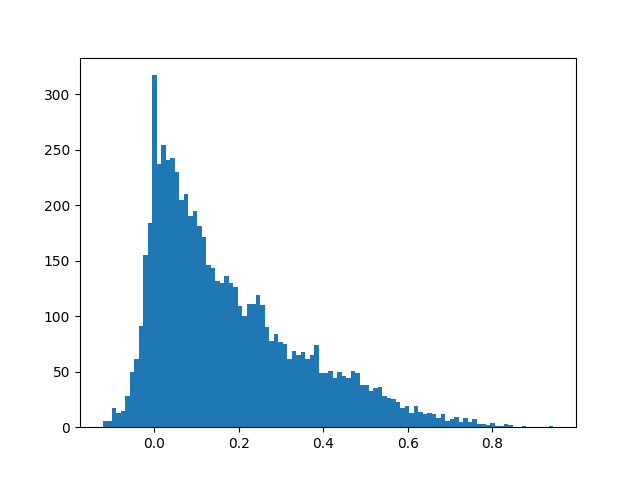

In [18]:
cs_sil         = results_tracking['cluster_quality_metrics']['cs_sil']
cs_intra_means = results_tracking['cluster_quality_metrics']['cs_intra_means']
cs_intra_maxs  = results_tracking['cluster_quality_metrics']['cs_intra_maxs']
cs_intra_mins  = results_tracking['cluster_quality_metrics']['cs_intra_mins']

confidence = (cs_sil * cs_intra_means * cs_intra_mins)

plt.figure()
plt.hist(confidence, 100);

In [21]:
labels = [c*t - (np.logical_not(c)) for c,t in zip(results_classification['preds'], results_tracking['UCIDs_bySession'])] if use_classificationResults else results_tracking['UCIDs_bySession']

FOVs_colored = roicat.visualization.compute_colored_FOV(
    spatialFootprints=results_tracking['ROIs']['ROIs_aligned'], 
    FOV_height=results_tracking['ROIs']['frame_height'], 
    FOV_width=results_tracking['ROIs']['frame_width'], 
#     labels=results_tracking['UCIDs_bySession'], 
    labels=labels,
#     alphas=confidence / np.percentile(confidence, 90),
    alphas=confidence > 0.1,
)

<IPython.core.display.Javascript object>


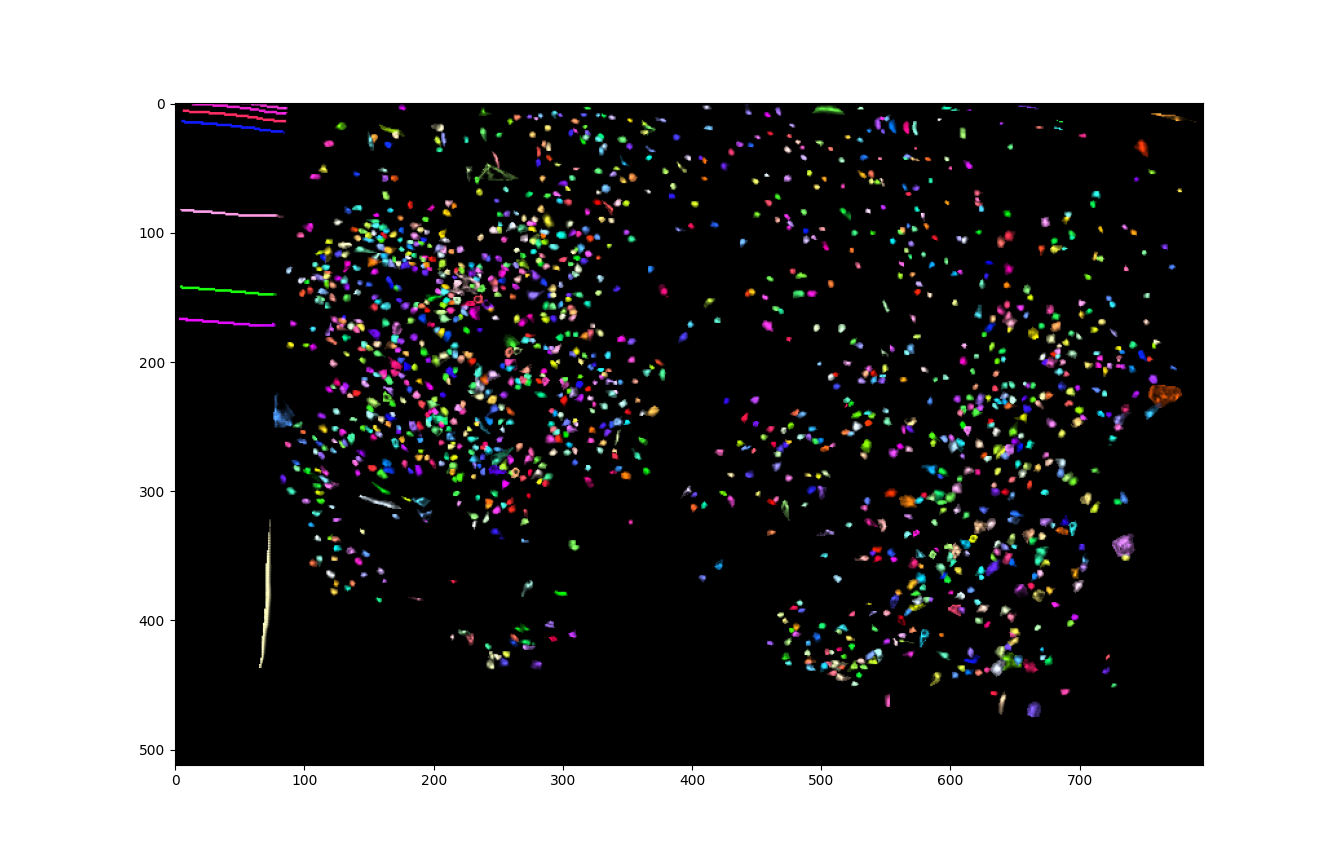

interactive(children=(IntSlider(value=0, description='i_frame', max=8), Output()), _dom_classes=('widget-inter…

In [29]:
%matplotlib notebook

roicat.visualization.display_toggle_image_stack(FOVs_colored)

/tmp/ipykernel_4100157/1698001595.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(40,1))


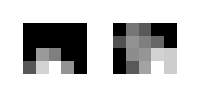

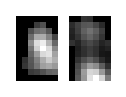

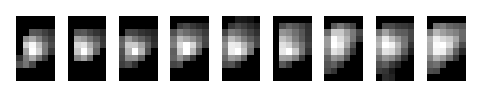

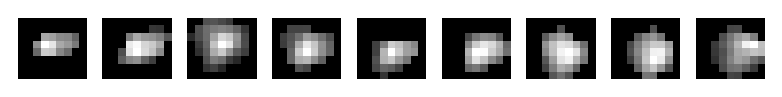

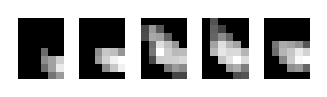

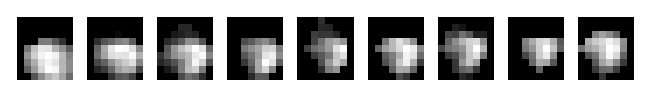

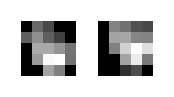

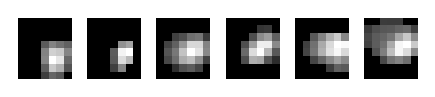

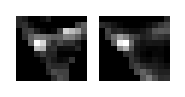

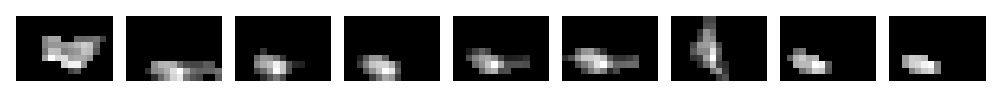

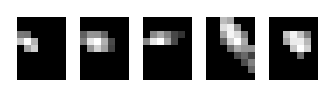

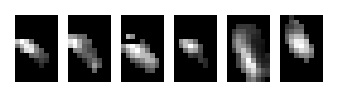

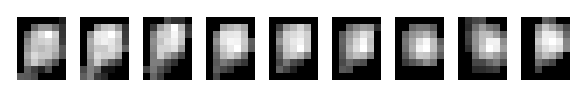

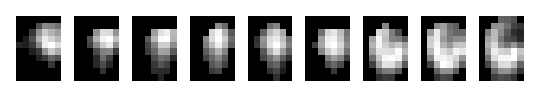

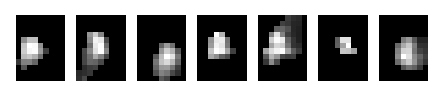

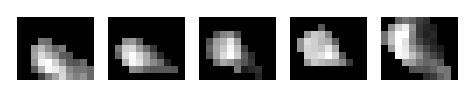

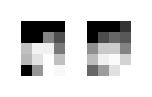

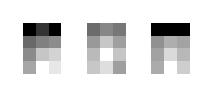

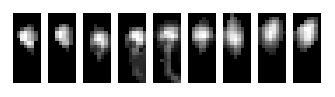

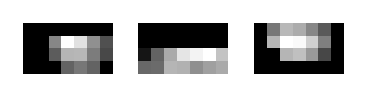

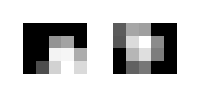

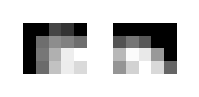

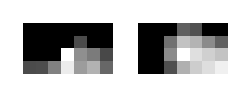

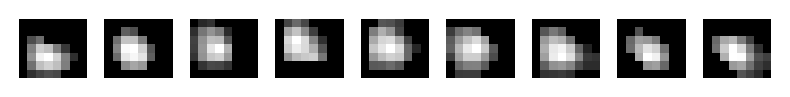

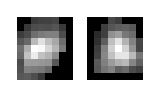

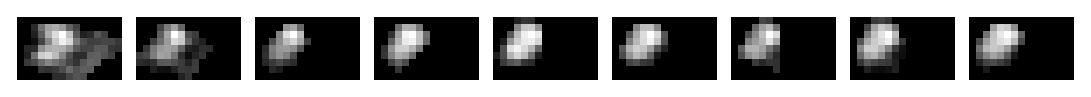

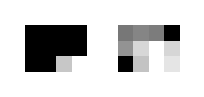

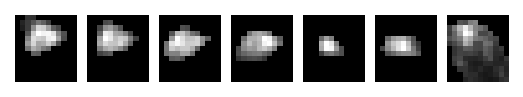

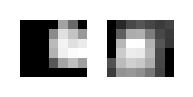

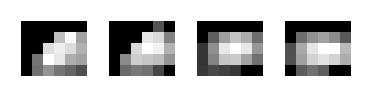

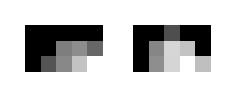

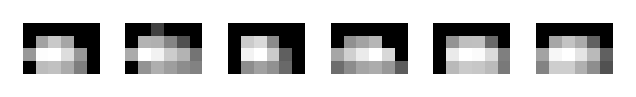

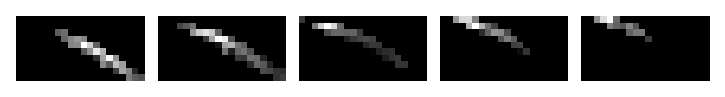

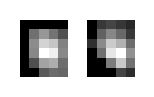

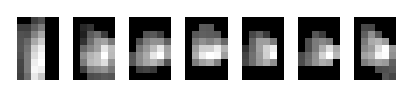

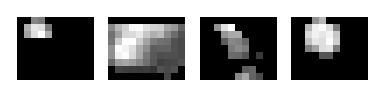

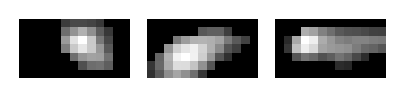

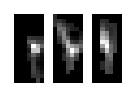

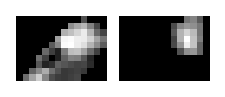

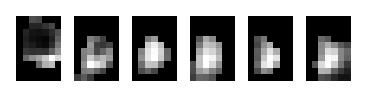

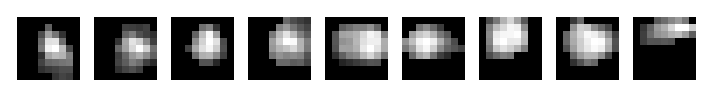

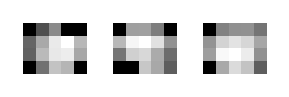

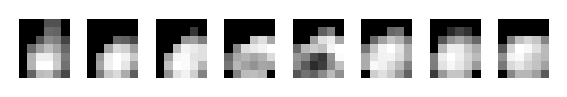

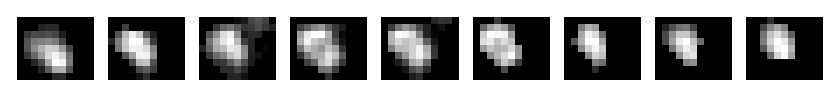

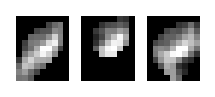

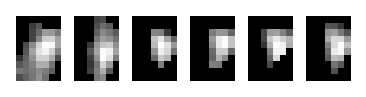

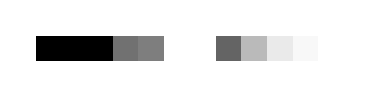

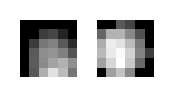

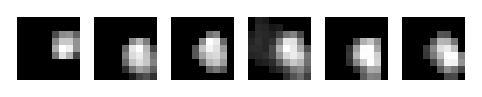

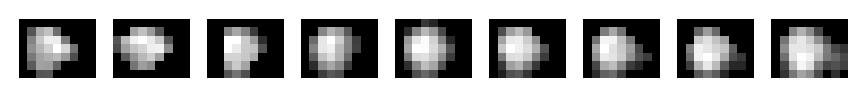

In [9]:
ucids = np.array(results_tracking['UCIDs'])
# ucids = np.concatenate(ucid_gt)
ucids_unique = np.unique(ucids[ucids>=0])

# ROI_ims = np.concatenate(data.ROI_images, axis=0)
ROI_ims_sparse = scipy.sparse.vstack(results_tracking['ROIs']['ROIs_aligned'])
ROI_ims_sparse = ROI_ims_sparse.multiply( ROI_ims_sparse.max(1).power(-1) ).tocsr()


ucid_sfCat = []
for ucid in ucids_unique:
    idx = np.where(ucids == ucid)[0]
    ucid_sfCat.append( np.concatenate(list(visualization.crop_cluster_ims(ROI_ims_sparse[idx].toarray().reshape(len(idx), results_tracking['ROIs']['frame_height'], results_tracking['ROIs']['frame_width']))), axis=1) )
#     ucid_sfCat.append( np.concatenate(list(ROI_ims_sparse[idx].toarray().reshape(len(idx), data.FOV_height, data.FOV_width)), axis=1) )
# data.ROI_images[i_sesh][idx] for 


%matplotlib inline

for ii in range(min(len(ucid_sfCat), 50)):
    plt.figure(figsize=(40,1))
    plt.imshow(ucid_sfCat[ii], cmap='gray')
    plt.axis('off')

<IPython.core.display.Javascript object>


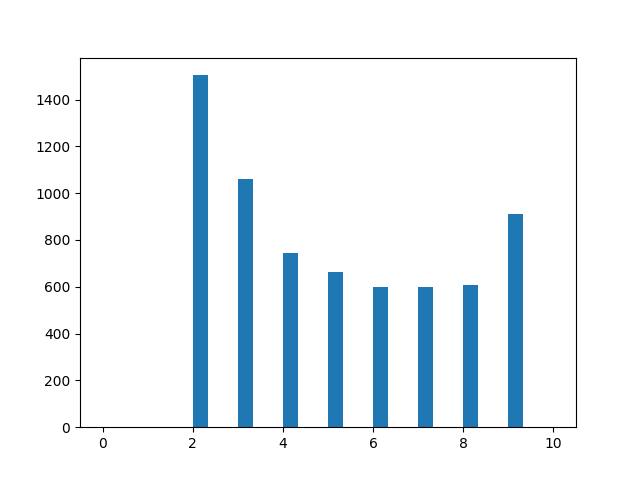

In [23]:
%matplotlib notebook

ucids = np.array(results_tracking['UCIDs'])
_, counts = np.unique(ucids, return_counts=True)

plt.figure()
plt.hist(counts, 30, range=(0, len(results_tracking['UCIDs_bySession'])+1));
